In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [171]:
dataframe =  pd.read_csv('C:/Users/anne.borges/OneDrive - FORTBRASIL ADM CARTOES DE CRED SA/Documentos/infinity_ds_project/data/walmart.csv')
df = dataframe

In [172]:
df['Marital_Status'] = df['Marital_Status'].astype(str)

In [173]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [174]:
qtd_clientes_unicos = df['User_ID'].nunique()
qtd_produtos = df['Product_ID'].nunique()
qtd_ocupacoes = df['Occupation'].nunique()
qtd_cidades = df['City_Category'].nunique()
qtd_publico_feminino =  df[df['Gender'] == 'F']['User_ID'].nunique()
qtd_publico_masculino =  df[df['Gender'] == 'M']['User_ID'].nunique()
qtd_total_compras = df['Purchase'].count()
qtd_compras_por_cidade = df.groupby('City_Category')['Purchase'].sum()
qtd_compras_por_categoria = df.groupby('Product_Category')['Purchase'].count()
qtd_compras_por_product_id = df.groupby('Product_ID')['Purchase'].count()

qtd_compras_por_categoria_genero = df.groupby(['Product_Category', 'Gender'])['Purchase'].count().unstack()
qtd_compras_por_estado_civil = df.groupby('Marital_Status')['Purchase'].sum()

qtd_usuarios_por_cidade = df.groupby('City_Category')['User_ID'].nunique().reset_index()
qtd_usuarios_por_cidade = df.groupby('Product_ID')['User_ID'].nunique().reset_index()


In [175]:
valores_unicos = df['Product_ID'].value_counts()
print(len(valores_unicos))
valores_unicos


3631


Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [194]:
print(df.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


In [177]:
mediana_compras = df['Purchase'].median()
mediana_compras_por_faixa_etaria = df.groupby('Age')['Purchase'].median()

In [178]:
percentual_publico_feminino = (qtd_publico_feminino / qtd_clientes_unicos) * 100
percentual_publico_masculino = (qtd_publico_masculino / qtd_clientes_unicos) * 100

In [179]:
percentual_compras_por_cidade = (qtd_compras_por_cidade / qtd_compras_por_cidade.sum()) * 100
percentual_compras_por_cidade

City_Category
A    25.834381
B    41.515136
C    32.650483
Name: Purchase, dtype: float64

In [180]:
percentual_compras_por_estado_civil = (qtd_compras_por_estado_civil / qtd_compras_por_estado_civil.sum()) * 100
percentual_compras_por_estado_civil

Marital_Status
0    59.047057
1    40.952943
Name: Purchase, dtype: float64

In [181]:
percentual_compras_categoria_produto = (qtd_compras_por_categoria / qtd_compras_por_categoria.sum()) * 100
percentual_compras_categoria_produto

Product_Category
1     25.520118
2      4.338373
3      3.674637
4      2.136645
5     27.438971
6      3.720631
7      0.676462
8     20.711076
9      0.074536
10     0.931703
11     4.415272
12     0.717548
13     1.008784
14     0.276875
15     1.143495
16     1.786688
17     0.105078
18     0.568112
19     0.291419
20     0.463579
Name: Purchase, dtype: float64

In [182]:
percentual_compras_por_product_id = (qtd_compras_por_product_id / qtd_compras_por_product_id.sum()) * 100
percentual_compras_por_product_id_top_10 = percentual_compras_por_product_id.nlargest(10)
percentual_compras_por_product_id_top_10

Product_ID
P00265242    0.341776
P00025442    0.293600
P00110742    0.293055
P00112142    0.283965
P00057642    0.267240
P00184942    0.261786
P00046742    0.261422
P00058042    0.258513
P00059442    0.255605
P00145042    0.255605
Name: Purchase, dtype: float64

In [183]:
media_compras_por_genero = df.groupby('Gender')['Purchase'].mean()
percentual_compras_genero = (df.groupby('Gender')['Purchase'].count() / qtd_total_compras) * 100
percentual_compras_categoria_genero = qtd_compras_por_categoria_genero.div(qtd_compras_por_categoria_genero.sum(axis=1), axis=0) * 100


In [184]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

outliers = df[(df['Purchase'] > limite_superior) | (df['Purchase'] < limite_inferior)]

Matriz de Correlação

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap da Matriz de Correlação")
plt.show()

Distribuição dos Clientes

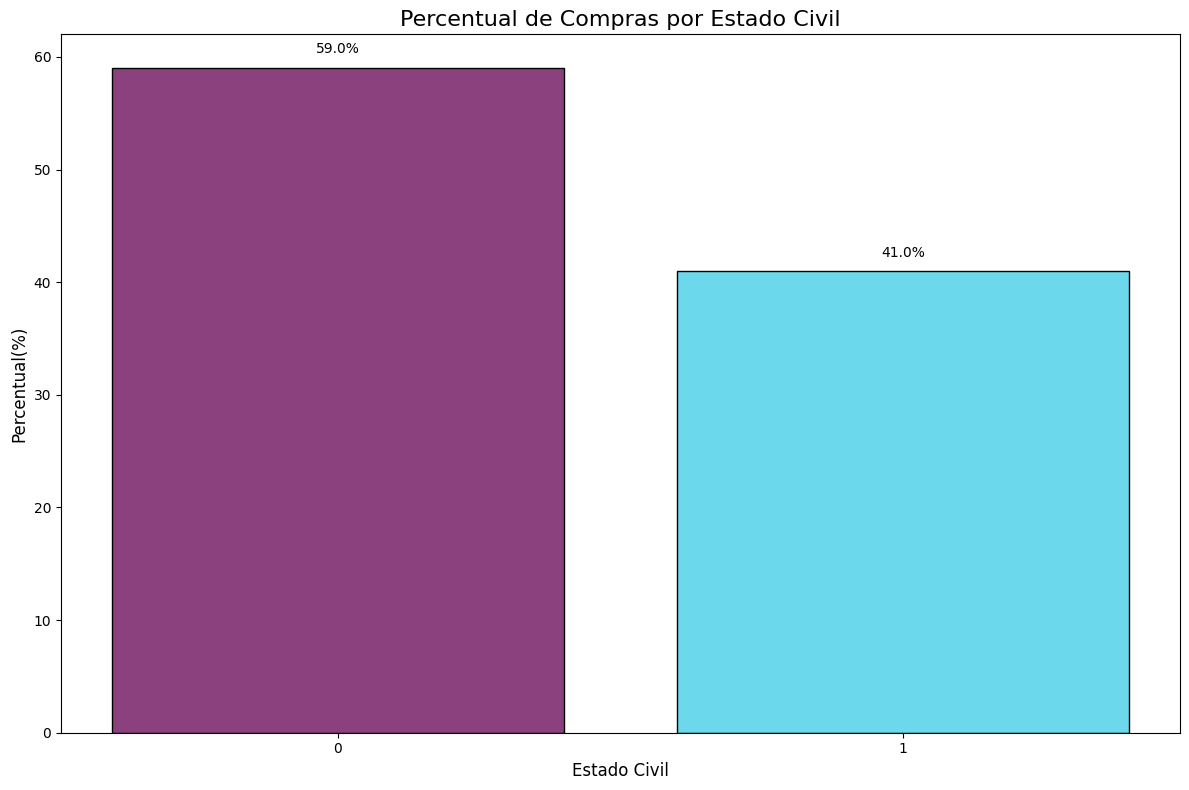

In [185]:
num_categorias = len(df['Marital_Status'])
cores_aleatorias = np.random.rand(num_categorias, 3)

plt.figure(figsize=(12, 8))

plt.bar(percentual_compras_por_estado_civil.index, 
        percentual_compras_por_estado_civil.values, 
        color=cores_aleatorias,
        edgecolor='black')

plt.title('Percentual de Compras por Estado Civil', fontsize=16)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Percentual(%)', fontsize=12)

for i in range(len(percentual_compras_por_estado_civil)):
    plt.text(i, percentual_compras_por_estado_civil.values[i] + 1,
             f'{percentual_compras_por_estado_civil.values[i]:.1f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


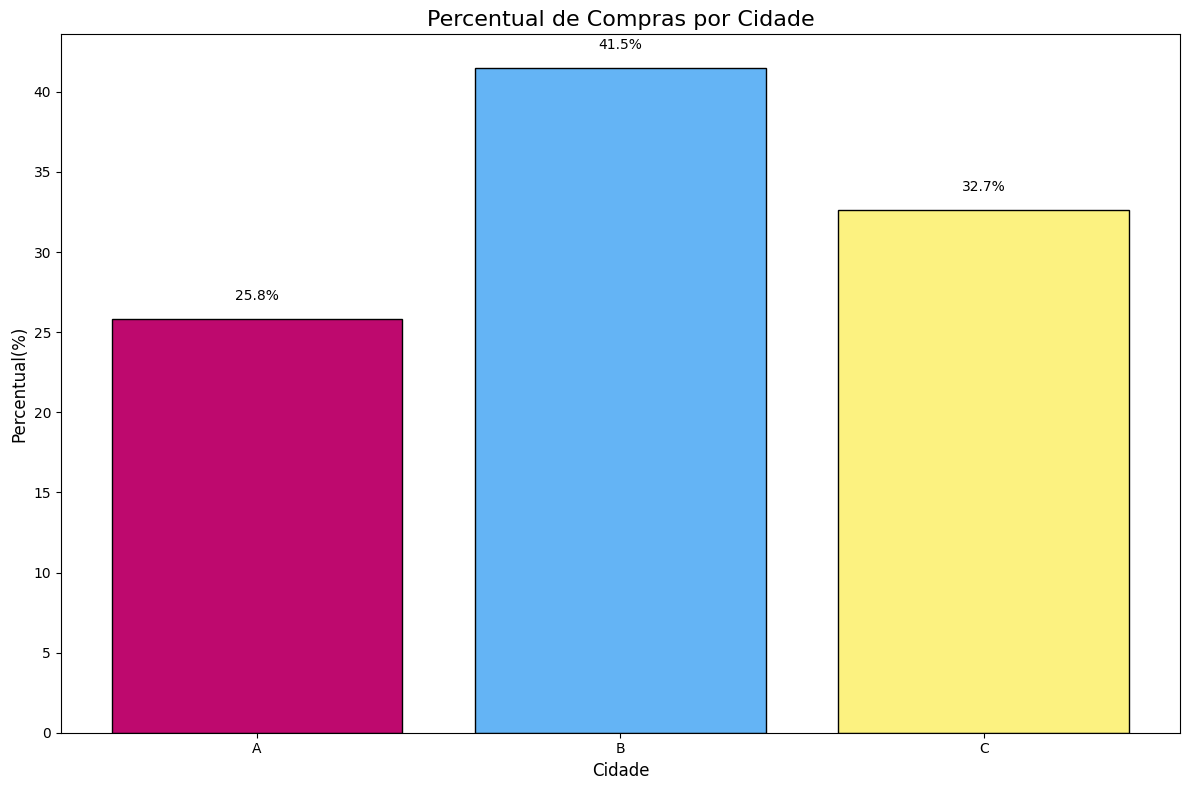

In [186]:
num_categorias = len(df['City_Category'])
cores_aleatorias = np.random.rand(num_categorias, 3)

plt.figure(figsize=(12, 8))

plt.bar(percentual_compras_por_cidade.index, 
        percentual_compras_por_cidade.values, 
        color=cores_aleatorias, 
        edgecolor='black')

plt.title('Percentual de Compras por Cidade', fontsize=16)
plt.xlabel('Cidade', fontsize=12)
plt.ylabel('Percentual(%)', fontsize=12)

for i in range(len(percentual_compras_por_cidade)):
    plt.text(i, percentual_compras_por_cidade.values[i] + 1,
             f'{percentual_compras_por_cidade.values[i]:.1f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


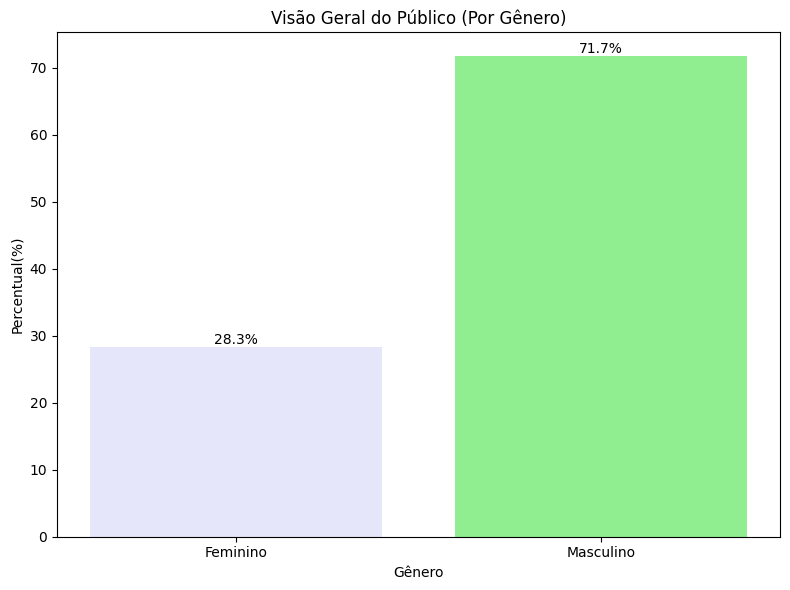

In [187]:
categorias = ['Feminino', 'Masculino']
percentuais = [percentual_publico_feminino, percentual_publico_masculino]

fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(categorias, percentuais, color=['lavender', 'lightgreen'])

plt.xlabel('Gênero')
plt.ylabel('Percentual(%)')
plt.title('Visão Geral do Público (Por Gênero)')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Média de compras por faixa etária.

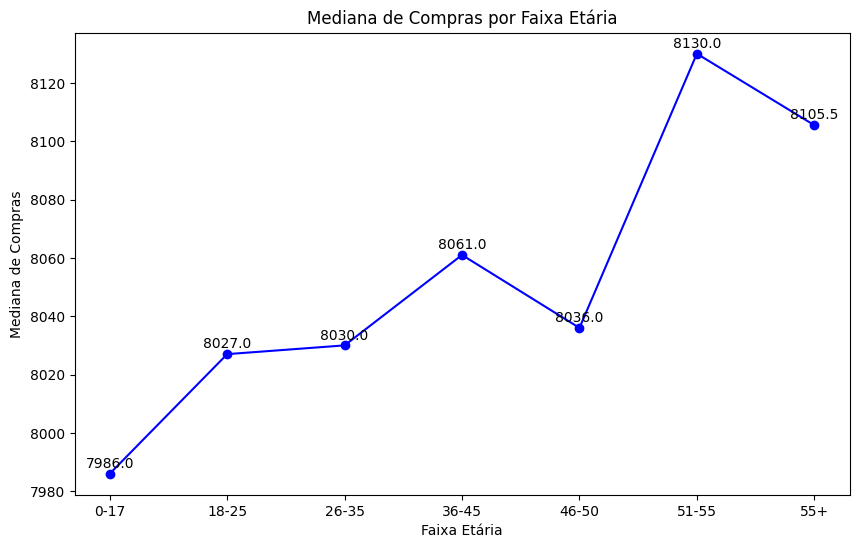

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(mediana_compras_por_faixa_etaria.index, mediana_compras_por_faixa_etaria.values, marker='o', linestyle='-', color='b')

for i, value in enumerate(mediana_compras_por_faixa_etaria):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.xlabel('Faixa Etária')
plt.ylabel('Mediana de Compras')
plt.title('Mediana de Compras por Faixa Etária')

plt.show()


Média de compras por gênero.

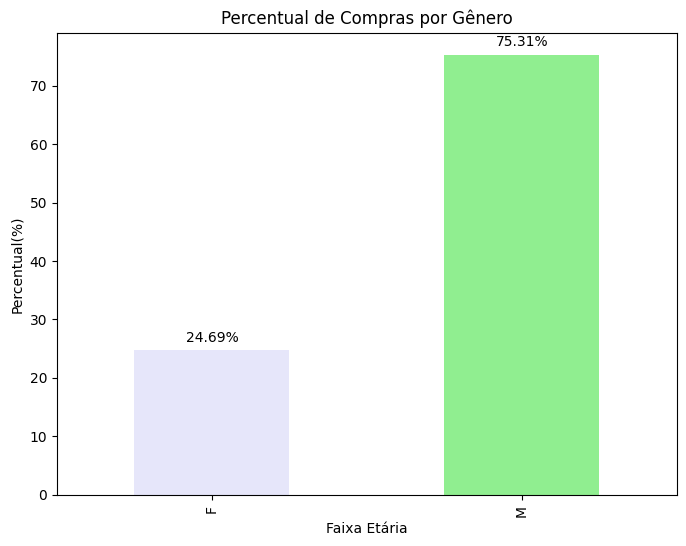

In [189]:

fig, ax = plt.subplots(figsize=(8, 6))

percentual_compras_genero.plot(kind='bar', color=['lavender', 'lightgreen'], ax=ax)

plt.xlabel('Faixa Etária')
plt.ylabel('Percentual(%)')
plt.title('Percentual de Compras por Gênero')

for i, value in enumerate(percentual_compras_genero):
    perc = percentual_compras_genero.iloc[i]
    ax.text(i, value + 1, f'{perc:.2f}%', ha='center', va='bottom', color='black')

plt.show()


Distribuição de Vendas por Categoria de Produto

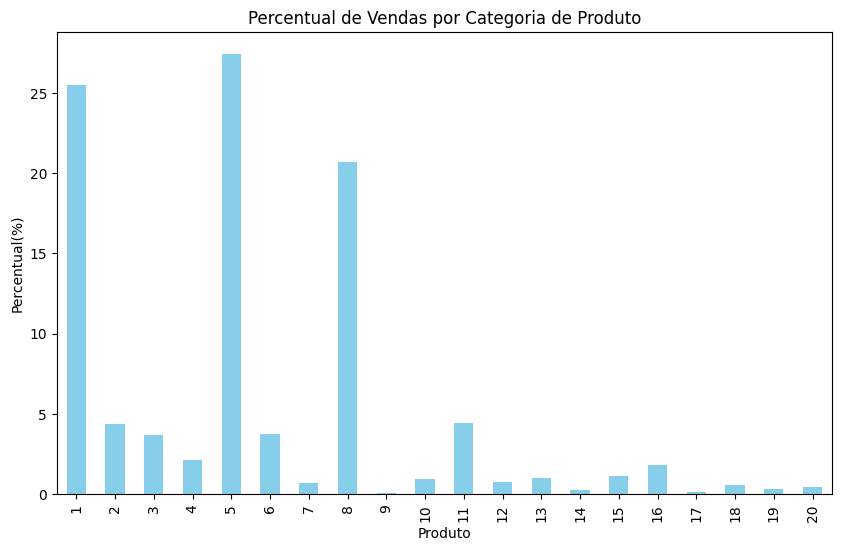

In [190]:

percentual_compras_categoria_produto.plot(kind='bar', color='skyblue', figsize=(10, 6))
percentual_compras_categoria_produto = percentual_compras_categoria_produto.sort_values(ascending=False)


plt.xlabel('Produto')
plt.ylabel('Percentual(%)')
plt.title('Percentual de Vendas por Categoria de Produto')

for i, value in enumerate(percentual_compras_categoria_produto):
    perc = percentual_compras_categoria_produto.iloc[i]
    ax.text(i, value + 1, f'{perc:.2f}%', ha='center', va='bottom', color='black')

plt.show()

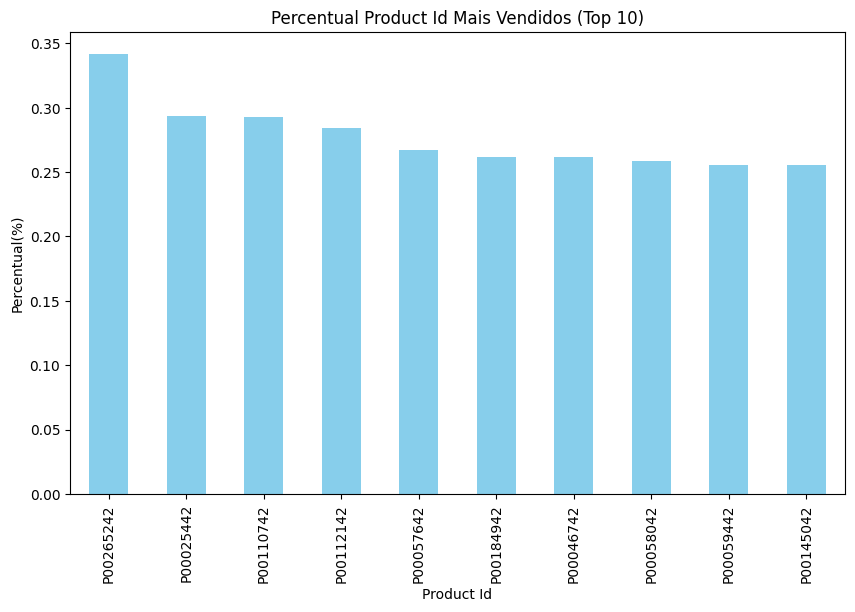

In [191]:

percentual_compras_por_product_id_top_10.plot(kind='bar', color='skyblue', figsize=(10, 6))
percentual_compras_por_product_id_top_10 = percentual_compras_por_product_id_top_10.sort_values(ascending=False)


plt.xlabel('Product Id')
plt.ylabel('Percentual(%)')
plt.title('Percentual Product Id Mais Vendidos (Top 10)')

plt.show()

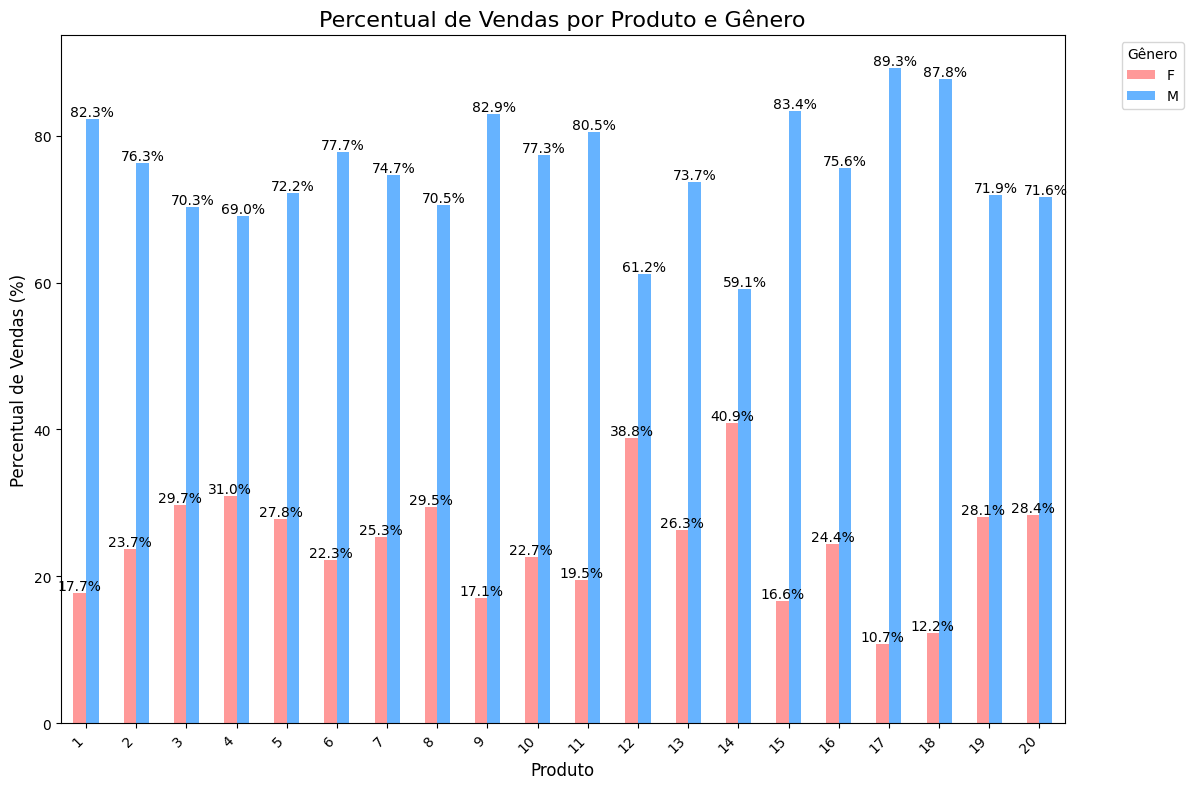

In [192]:
fig, ax = plt.subplots(figsize=(12, 8))

percentual_compras_categoria_genero.plot(kind='bar', ax=ax, color=['#ff9999', '#66b3ff'])

ax.set_title('Percentual de Vendas por Produto e Gênero', fontsize=16)
ax.set_xlabel('Produto', fontsize=12)
ax.set_ylabel('Percentual de Vendas (%)', fontsize=12)

ax.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
